In [1]:
pip install calysto

     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 215kB 52.3MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 204kB 52.2MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.1.0-cp36-none-any.whl size=88591 sha256=208774177921f6eec0839843eb35155fac45291b834c5e778d744a454df2cf81
  Stored in directory: /root/.cache/pip/wheels/11/5e/47/167d9dfd5fa5850dd0cd3db80afe6db46e620edec3419dce5a
Successfully built cairocffi


In [32]:
from calysto.ai.conx import *

net = Network()
net.addLayers(2, 2, 1)
net

Conx using seed: 1575457480.919897


Layer 'output': (Kind: Output, Size: 1, Active: 1, Frozen: 0)
Target    : 0.00  
Activation: 0.00  
Layer 'hidden': (Kind: Hidden, Size: 2, Active: 1, Frozen: 0)
Activation: 0.00  0.00  
Layer 'input': (Kind: Input, Size: 2, Active: 1, Frozen: 0)
Activation: 0.00  0.00  

In [33]:
net.propagate(input=[0, 0])

array('d', [0.5167926641414708])

In [34]:
print("Combinations and their accuracy")

for pattern in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    print(pattern, net.propagate(input=pattern))

Combinations and their accuracy
[0, 0] array('d', [0.5167926641414708])
[0, 1] array('d', [0.5170037632258968])
[1, 0] array('d', [0.5169093306152311])
[1, 1] array('d', [0.5171198610715386])


In [35]:
print("provide training patterns for inputs and outputs.........")
net.setInputs([[0.0, 0.0],[1.0, 0.0],[0.0, 1.0],[1.0, 1.0]])
net.setOutputs([[0.0],[1.0],[1.0],[0.0]])

print("setting learning parameters.....")
net.setEpsilon(0.5)
net.setTolerance(0.2)
net.setReportRate(1)

print("and learn")
net.train()

provide training patterns for inputs and outputs.........
setting learning parameters.....
and learn
Epoch #     1 | TSS Error: 1.1799 | Correct: 0.0000 | RMS Error: 0.5431
Epoch #     2 | TSS Error: 1.1222 | Correct: 0.0000 | RMS Error: 0.5297
Epoch #     3 | TSS Error: 1.0711 | Correct: 0.0000 | RMS Error: 0.5175
Epoch #     4 | TSS Error: 1.1640 | Correct: 0.0000 | RMS Error: 0.5394
Epoch #     5 | TSS Error: 1.0806 | Correct: 0.0000 | RMS Error: 0.5198
Epoch #     6 | TSS Error: 1.0596 | Correct: 0.0000 | RMS Error: 0.5147
Epoch #     7 | TSS Error: 1.1647 | Correct: 0.0000 | RMS Error: 0.5396
Epoch #     8 | TSS Error: 1.0398 | Correct: 0.0000 | RMS Error: 0.5099
Epoch #     9 | TSS Error: 1.0316 | Correct: 0.0000 | RMS Error: 0.5078
Epoch #    10 | TSS Error: 1.0792 | Correct: 0.0000 | RMS Error: 0.5194
Epoch #    11 | TSS Error: 1.1784 | Correct: 0.0000 | RMS Error: 0.5428
Epoch #    12 | TSS Error: 1.0386 | Correct: 0.0000 | RMS Error: 0.5096
Epoch #    13 | TSS Error: 1.0611 |

In [36]:
print("Again checking for the accuracy for patterns")
for pattern in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    print(pattern, net.propagate(input=pattern))

Again checking for the accuracy for patterns
[0, 0] array('d', [0.0840333290495038])
[0, 1] array('d', [0.8283348240973767])
[1, 0] array('d', [0.8312778045578357])
[1, 1] array('d', [0.11086329326025046])


In [16]:
net.propagate(input=[0.8, 0.8])

array('d', [0.46142165560876086])

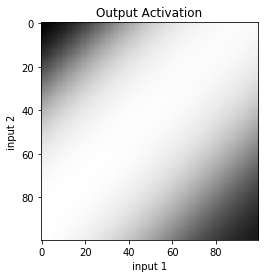

In [17]:
import numpy as np
import matplotlib.pyplot as plt
z = np.zeros((100, 100))

for x in range(100):
    for y in range(100):
        z[x][y] = net.propagate(input=[x/100, y/100])[0]

plt.imshow(z, cmap=plt.cm.gray, interpolation='nearest')
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.title("Output Activation")

plt.show()